In [167]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [91]:
movie=pd.read_csv('movies.dat',sep='::',engine='python',encoding='latin1')
movie.columns=['MovieIDs','MovieName','Category']
movie.dropna(inplace=True)
movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [93]:
rating=pd.read_csv("ratings.dat",sep='::',engine='python')
rating.columns=['ID','MovieID','Ratings','TimeStamp']
rating.dropna(inplace=True)
rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [94]:
user=pd.read_csv("users.dat",sep='::',engine='python')
user.columns=['UserID','Gender','Age','Occupation','Zip-code']
user.dropna(inplace=True)
user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [95]:
df=pd.concat([movie,rating,user],axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


## Data Visualization

<Axes: title={'center': 'Bar Graph'}>

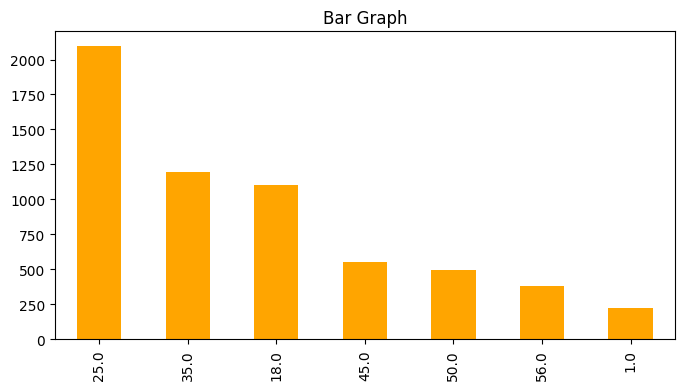

In [224]:
df['Age'].value_counts().plot(kind ='bar',figsize=(8,4),title="Bar Graph",color='orange')

<Axes: >

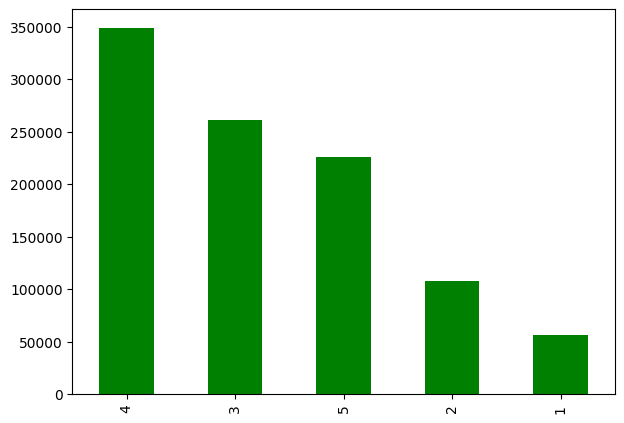

In [226]:
df['Ratings'].value_counts().plot(color='green',kind='bar',figsize=(7, 5))

[]

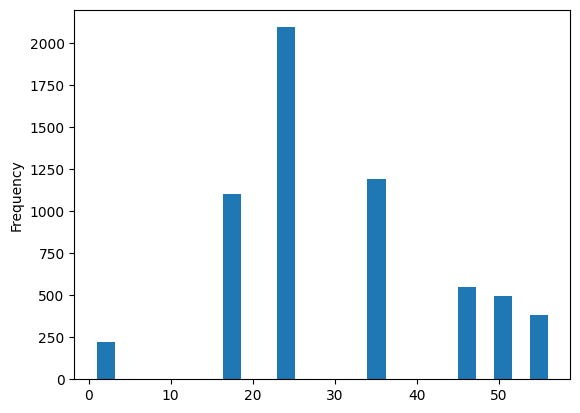

In [227]:
df.Age.plot.hist(bins = 25).plot(title="User Age distribution",xlabel='Age',ylabel='Count')

In [100]:
a=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
df['age_group']=pd.cut(df.Age,range(0,81,10),right=False,labels=a)
df[['Age','age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


In [144]:
movie=df.groupby('MovieName')
rating=df.groupby('Ratings')
user=df.groupby('UserID')

In [145]:
movies=movie.size().sort_values(ascending=True)[:1000]

In [146]:
movies

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64

In [147]:
data=movie.get_group('Toy Story 2 (1999)')
data.shape

(1, 13)

Text(0.5, 1.0, 'Rating of "Toy Story 2 (1999)"')

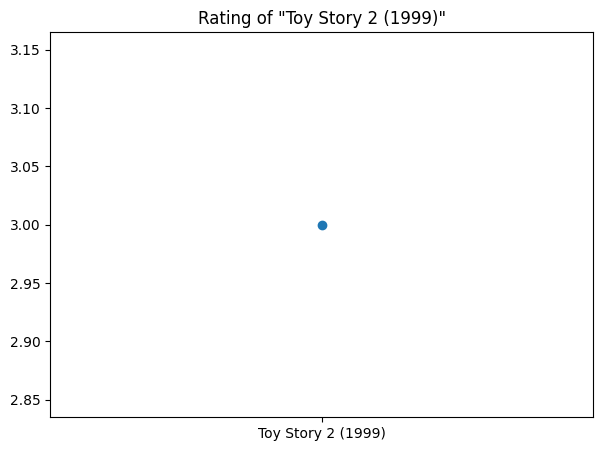

In [148]:
plt.figure(figsize=(7,5))
plt.scatter(data['MovieName'],data['Ratings'])
plt.title('Rating of "Toy Story 2 (1999)"')

In [149]:
data[['MovieName','age_group']]

,MovieName,age_group
3044,Toy Story 2 (1999),0-9


<Axes: >

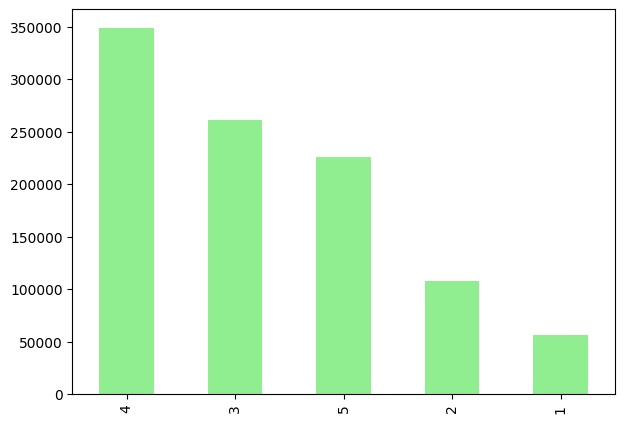

In [229]:
df[25:]['Ratings'].value_counts().plot(color='lightgreen',kind='bar',figsize=(7,5))

In [230]:
user.get_group(7)[['UserID','Ratings']]

,UserID,Ratings
5,7.0,5


## Machine Learning

In [231]:
sample=df[500:]
sample.dropna(inplace=True)

<ipython-input-231-5f42b51875d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.dropna(inplace=True)


In [232]:
x=sample[['MovieID','Age','Occupation']].values
y=sample[['Ratings']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [233]:
# Logistic Regression
log=LogisticRegression()
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
acc_model1=accuracy_score(y_test,y_pred)
acc_lg=round(log.score(x_train,y_train)*100,2)
acc_lg

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


32.9

In [234]:
# Support Vector Machines
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_model2=accuracy_score(y_test,y_pred)
acc_svm=round(svc.score(x_train,y_train)*100,2)
acc_svm

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


33.12

In [235]:
# K Nearest Neighbours Classifie
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc_model3=accuracy_score(y_test,y_pred)
acc_knn=round(knn.score(x_train,y_train)*100,2)
acc_knn

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


58.37

In [236]:
# Gaussian Naive Bayes
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
acc_model4=accuracy_score(y_test,y_pred)
acc_gb=round(gb.score(x_train, y_train)*100,2)
acc_gb

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


33.2

In [218]:
# perceptron
p=Perceptron()
p.fit(x_train,y_train)
y_pred=p.predict(x_test)
acc_model5=accuracy_score(y_test,y_pred)
acc_p=round(p.score(x_train,y_train)*100,2)
acc_p

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


33.01

In [219]:
# Linear SVC
svc=LinearSVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_model6=accuracy_score(y_test,y_pred)
acc_svc=round(svc.score(x_train,y_train)*100,2)
acc_svc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


22.96

In [220]:
# Stochastic Gradient Descent
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
acc_model7=accuracy_score(y_test,y_pred)
acc_sgd=round(sgd.score(x_train, y_train)*100,2)
acc_sgd

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.21

In [221]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
acc_model8=accuracy_score(y_test,y_pred)
acc_dt=round(dt.score(x_train,y_train)*100,2)
acc_dt

98.0

In [222]:
# Random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc_model5=accuracy_score(y_test,y_pred)
rf.score(x_train,y_train)
acc_rf=round(rf.score(x_train,y_train)*100,2)
acc_rf

<ipython-input-222-9bd0289ff0e5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


98.0

In [223]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svm,acc_knn,acc_lg,acc_rf,acc_gb,acc_p,acc_sgd,acc_svc,acc_dt]})
models.sort_values(by = 'Score')

,Model,Score
7,Linear SVC,22.96
6,Stochastic Gradient Decent,28.21
2,Logistic Regression,32.90
5,Perceptron,33.01
0,Support Vector Machines,33.12
4,Naive Bayes,33.20
1,KNN,58.37
3,Random Forest,98.00
8,Decision Tree,98.00
